# Object Detection

Object detection = Classification + Localization

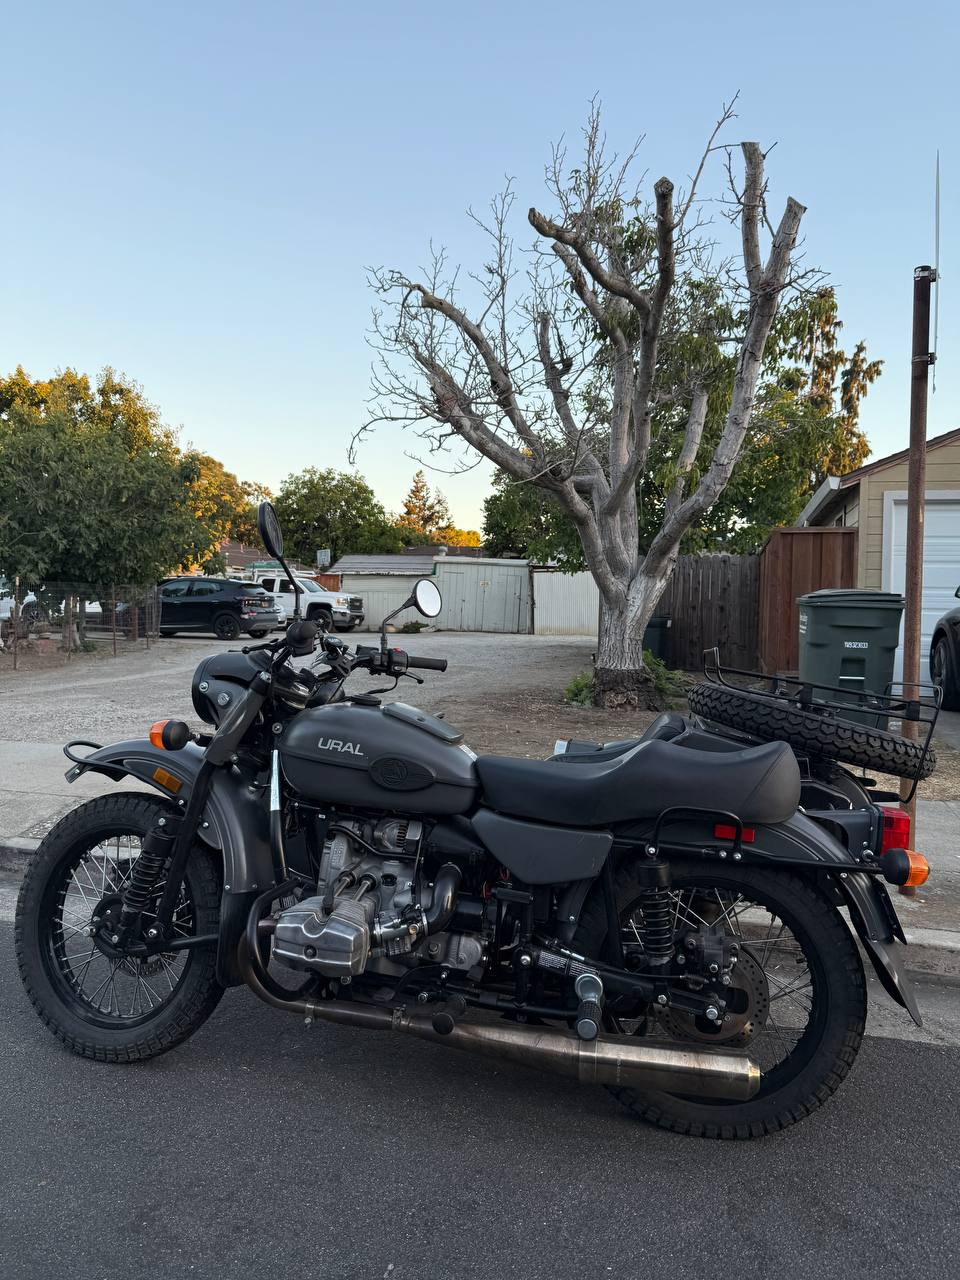

In [1]:
from IPython.display import Image
Image(filename='data/bike.jpg', width=400)

In [2]:
from transformers import pipeline

In [ ]:
pipe = pipeline("object-detection", "facebook/detr-resnet-50")

In [12]:
from PIL import Image, ImageDraw, ImageFont

In [9]:
image = Image.open("data/bike.jpg")

In [13]:
detections = pipe(image)

In [14]:
pipe_output

[{'score': 0.569962203502655,
  'label': 'car',
  'box': {'xmin': 5, 'ymin': 599, 'xmax': 45, 'ymax': 628}},
 {'score': 0.7950771450996399,
  'label': 'car',
  'box': {'xmin': 936, 'ymin': 601, 'xmax': 960, 'ymax': 710}},
 {'score': 0.9339423775672913,
  'label': 'car',
  'box': {'xmin': 153, 'ymin': 578, 'xmax': 279, 'ymax': 643}},
 {'score': 0.9659289717674255,
  'label': 'truck',
  'box': {'xmin': 153, 'ymin': 578, 'xmax': 277, 'ymax': 644}},
 {'score': 0.9711571931838989,
  'label': 'truck',
  'box': {'xmin': 244, 'ymin': 569, 'xmax': 366, 'ymax': 632}},
 {'score': 0.9985654950141907,
  'label': 'motorcycle',
  'box': {'xmin': 10, 'ymin': 498, 'xmax': 936, 'ymax': 1142}},
 {'score': 0.5230274200439453,
  'label': 'car',
  'box': {'xmin': 71, 'ymin': 597, 'xmax': 121, 'ymax': 623}}]

In [15]:
# Define colors for different object classes
colors = {
    'car': 'red',
    'truck': 'blue',
    'motorcycle': 'green',
    'person': 'yellow',
    'bicycle': 'purple',
    'bus': 'orange'
}

# Load the original image
image_path = 'data/bike.jpg'
image = Image.open(image_path)
draw = ImageDraw.Draw(image)

# Try to use a better font, fallback to default if not available
try:
    font = ImageFont.truetype("arial.ttf", 16)
except:
    font = ImageFont.load_default()

# Draw bounding boxes and labels
for detection in detections:
    label = detection['label']
    score = detection['score']
    box = detection['box']
    
    # Get coordinates
    xmin = box['xmin']
    ymin = box['ymin']
    xmax = box['xmax']
    ymax = box['ymax']
    
    # Get color for this label
    color = colors.get(label, 'white')
    
    # Draw bounding box
    # Draw a thicker box by drawing multiple rectangles
    for i in range(3):
        draw.rectangle(
            [(xmin - i, ymin - i), (xmax + i, ymax + i)],
            outline=color,
            width=1
        )
    
    # Create label with confidence score
    label_text = f"{label}: {score:.2f}"
    
    # Get text size for background
    bbox = draw.textbbox((xmin, ymin), label_text, font=font)
    text_width = bbox[2] - bbox[0]
    text_height = bbox[3] - bbox[1]
    
    # Draw text background
    padding = 2
    draw.rectangle(
        [(xmin, ymin - text_height - 2*padding), 
         (xmin + text_width + 2*padding, ymin)],
        fill=color
    )
    
    # Draw text
    draw.text(
        (xmin + padding, ymin - text_height - padding),
        label_text,
        fill='white',
        font=font
    )

# Save the annotated image
output_path = 'data/bike_annotated.jpg'
image.save(output_path)
print(f"Annotated image saved to: {output_path}")

# Optional: Display image dimensions and number of detections
print(f"Image dimensions: {image.size}")
print(f"Number of objects detected: {len(detections)}")
print("\nDetected objects summary:")
label_counts = {}
for det in detections:
    label = det['label']
    label_counts[label] = label_counts.get(label, 0) + 1

for label, count in label_counts.items():
    print(f"  {label}: {count}")

Annotated image saved to: data/bike_annotated.jpg
Image dimensions: (960, 1280)
Number of objects detected: 7

Detected objects summary:
  car: 4
  truck: 2
  motorcycle: 1
